In [1]:
import pandas as pd

In [15]:
bus_stops = pd.read_csv("bus_stops.csv")
bus_routes = pd.read_csv("bus_routes.csv")

In [13]:
# Latitude and Longitude are separately stored
print(bus_stops)

      BusStopCode           RoadName             Description  Latitude  \
0            1012        Victoria St     Hotel Grand Pacific  1.296848   
1            1013        Victoria St         St. Joseph's Ch  1.297710   
2            1019        Victoria St         Bras Basah Cplx  1.296990   
3            1029      Nth Bridge Rd            Opp Natl Lib  1.296673   
4            1039      Nth Bridge Rd              Bugis Cube  1.298208   
...           ...                ...                     ...       ...   
5044        99139  Changi Village Rd                   Blk 5  1.388195   
5045        99161          Nicoll Dr   Bef Changi Beach CP 3  1.390262   
5046        99171          Nicoll Dr       Changi Beach CP 2  1.391128   
5047        99181      Telok Paku Rd  Bef S'pore Aviation Ac  1.387754   
5048        99189      Telok Paku Rd      S'pore Aviation Ac  1.388414   

       Longitude  
0     103.852536  
1     103.853225  
2     103.853022  
3     103.854414  
4     103.855491

In [4]:
import matplotlib.pyplot as plt

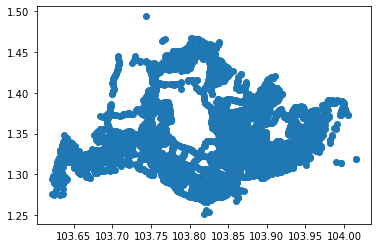

In [5]:
plt.scatter(x = bus_stops.Longitude, y = bus_stops.Latitude)

In [16]:
print(bus_routes)

      ServiceNo Operator  Direction  StopSequence BusStopCode  Distance  \
0            10     SBST          1             1       75009       0.0   
1            10     SBST          1             2       76059       0.6   
2            10     SBST          1             3       76069       1.1   
3            10     SBST          1             4       96289       2.3   
4            10     SBST          1             5       96109       2.7   
...         ...      ...        ...           ...         ...       ...   
26248       NR8     SMRT          1            57       43839      22.9   
26249       NR8     SMRT          1            58       43649      23.2   
26250       NR8     SMRT          1            59       43589      23.7   
26251       NR8     SMRT          1            60       43579      24.1   
26252       NR8     SMRT          1            61       43609      24.4   

      WD_FirstBus WD_LastBus SAT_FirstBus SAT_LastBus SUN_FirstBus SUN_LastBus  
0            0500 

In [19]:
# Merging the 2 files on the "BusStopCode" column

# ValueError: You are trying to merge on int64 and object columns. If you wish to proceed you should use pd.concat

# Concat does not give me what I want.
# bus_r_and_s = pd.concat((bus_stops, bus_routes), axis = 1)

print(bus_routes.dtypes)

ServiceNo        object
Operator         object
Direction         int64
StopSequence      int64
BusStopCode      object
Distance        float64
WD_FirstBus      object
WD_LastBus       object
SAT_FirstBus     object
SAT_LastBus      object
SUN_FirstBus     object
SUN_LastBus      object
dtype: object


In [20]:
print(bus_stops.dtypes)

BusStopCode      Int64
RoadName        object
Description     object
Latitude       float64
Longitude      float64
dtype: object


In [17]:
bus_stops["BusStopCode"] = bus_stops["BusStopCode"].astype("str").str.zfill(5)
bus_routes["BusStopCode"] = bus_routes["BusStopCode"].astype("str").str.zfill(5)

In [18]:
# Version 1
# Need to convert Int64 type to Object type
bus_r_and_s_2 = bus_stops.merge(bus_routes, how="left", on="BusStopCode")
bus_r_and_s_2.head()
##  WHY IS IT BLANK :(

,BusStopCode,RoadName,Description,Latitude,Longitude,ServiceNo,Operator,Direction,StopSequence,Distance,WD_FirstBus,WD_LastBus,SAT_FirstBus,SAT_LastBus,SUN_FirstBus,SUN_LastBus
0,01012,Victoria St,Hotel Grand Pacific,1.296848,103.852536,12,GAS,2,8,3.8,0608,0017,0611,0018,0640,0018
1,01012,Victoria St,Hotel Grand Pacific,1.296848,103.852536,12e,GAS,2,7,3.9,1248,2347,1248,2346,1248,2345
2,01012,Victoria St,Hotel Grand Pacific,1.296848,103.852536,175,SBST,1,44,19.0,0706,0028,0700,0027,0657,0025
3,01012,Victoria St,Hotel Grand Pacific,1.296848,103.852536,2,GAS,2,8,3.8,0555,0017,0553,0017,0555,0016
4,01012,Victoria St,Hotel Grand Pacific,1.296848,103.852536,2A,GAS,1,8,3.8,0637,1916,-,-,-,-


In [38]:
# Version 2 
bus_r_and_s = bus_stops.merge(bus_routes,
                         how = 'left', 
                         left_on = 'BusStopCode',
                         right_on = 'BusStopCode')

In [39]:
bus_r_and_s.head()
# Why is it shown as NaN :(

,BusStopCode,RoadName,Description,Latitude,Longitude,ServiceNo,Operator,Direction,StopSequence,Distance,WD_FirstBus,WD_LastBus,SAT_FirstBus,SAT_LastBus,SUN_FirstBus,SUN_LastBus
0,1012,Victoria St,Hotel Grand Pacific,1.296848,103.852536,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1013,Victoria St,St. Joseph's Ch,1.297710,103.853225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1019,Victoria St,Bras Basah Cplx,1.296990,103.853022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1029,Nth Bridge Rd,Opp Natl Lib,1.296673,103.854414,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1039,Nth Bridge Rd,Bugis Cube,1.298208,103.855491,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
